In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## helpers

In [10]:
def add_axis(ax,axis,formula,name):
    '''function that adds 2nd x or y axis'''    
    if axis == 'x':
        values = ax.get_xticks().tolist()
        ax_new = ax.twiny()
    elif axis == 'y':
        values = ax.get_yticks().tolist()
        ax_new = ax.twinx()
        
    new_ticks = [formula(tick) for tick in values]
    
    if axis == 'x':
        ax_new.set_xticklabels(new_ticks)
        ax_new.set_xlabel(name)
        ax_new.xaxis.set_ticks_position('bottom')
        ax_new.xaxis.set_label_position('bottom')
        ax_new.spines['bottom'].set_position(('outward', 40))
        ax_new.set_xlim(ax.get_xlim())
    elif axis == 'y':
        ax_new.set_yticklabels(new_ticks)
        ax_new.set_ylabel(name)
        ax_new.yaxis.set_ticks_position('left')
        ax_new.yaxis.set_label_position('left')
        ax_new.spines['left'].set_position(('outward', 50))
        ax_new.set_ylim(ax.get_ylim())
        
    return ax_new

def calc_magn(ang,*l):
    '''function that calculates (integrated) magnetic field'''    
    if not l:
        B = ang*1.23 # integrated B-field [Tm]
    else:
        B = ang*1.23/l
    
    return round(B,3)

## kick angle evalution

In [3]:
# geometric considerations

x_sep = 0.06
x_add = 0.24

steps = 100
Thet_k = np.arange(1,100,(100-1)/steps)*1e-3
Thet_p = np.arange(1,1000,(1000-1)/steps)*1e-3

In [4]:
# propagation length function


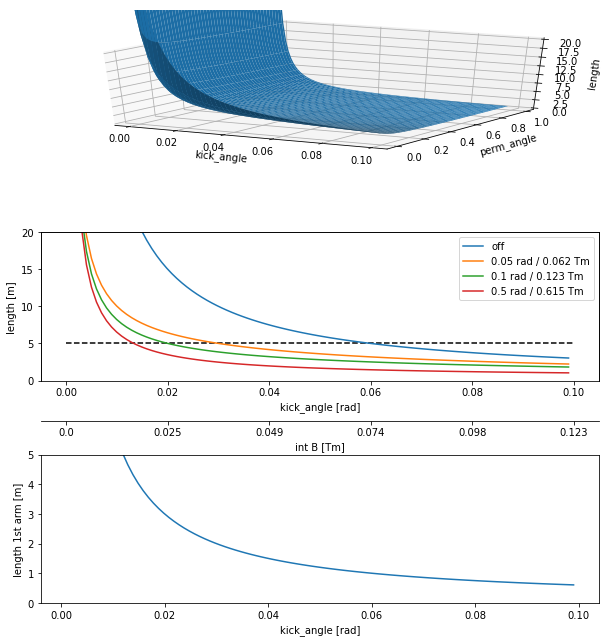

In [39]:
# surface plot 3D
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(411, projection = '3d')

x,y = np.meshgrid(Thet_k,Thet_p)
ax.plot_surface(X = x,Y = y,Z = x_sep/np.sin(x) + x_add/np.sin(x+y))
ax.set_xlabel('kick_angle', labelpad = 10)
ax.set_ylabel('perm_angle', labelpad = 10)
ax.set_zlabel('length')
ax.set_zlim(0,20)


# sliced plot
ax1 = fig.add_subplot(412)
ax5 = fig.add_subplot(413)
Thet_p_list = np.multiply([0,50,100,500],1e-3)
for Thet_p_fix in Thet_p_list:
    ax1.plot(Thet_k, x_sep/np.sin(Thet_k) + x_add/np.sin(Thet_k+Thet_p_fix))
    
    
ax1.set_ylabel('length [m]')
ax1.set_ylim(ax.get_zlim())
ax1.set_xlabel('kick_angle [rad]')
# B field calculated for 70 Mev protons, 0.5 m kicker length
ax1.legend(['{} rad / {} Tm'.format(x,calc_magn(x)) if x !=0 else 'off' for x in Thet_p_list])
ax1.hlines(5,0,0.1, linestyles='--')

ax5.plot(Thet_k, x_sep/np.sin(Thet_k))
ax5.set_ylabel('length 1st arm [m]')
ax5.set_ylim(0,5)
ax5.set_xlabel(ax1.get_xlabel())


# add B-field information
add_axis(ax1,'x',calc_magn,'int B [Tm]')


plt.subplots_adjust(hspace = 0.5)
plt.savefig('/home/marius/JÃ¼lich/Multiplexer/kick_angle_eval_geom_2')
plt.show()

In [6]:
# iterative solution (kick ~ perm)
d = {}

for Thet_p_iter in np.linspace(0,1,101):
            Thet_k_iter = 0.001
            f = x_sep/np.sin(Thet_k_iter) + x_add/np.sin(Thet_k_iter + Thet_p_iter)
            while f >= 5:
                Thet_k_iter = Thet_k_iter + 0.001
                f = x_sep/np.sin(Thet_k_iter) + x_add/np.sin(Thet_k_iter + Thet_p_iter)
            
            d[Thet_p_iter] = round(Thet_k_iter,3)

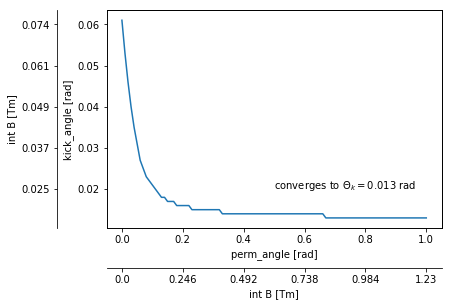

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(*zip(*sorted(d.items())))
ax.set_ylabel('kick_angle [rad]')
ax.set_xlabel('perm_angle [rad]')

last_ele = list(d.values())[-1]
ax.text(0.5,0.02, r'converges to $\Theta_k = {}$ rad'.format(last_ele))

# add B-field information
add_axis(ax,'x',calc_magn,'int B [Tm]')
add_axis(ax,'y',calc_magn,'int B [Tm]')

plt.show()